In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.tools as tls
import IPython
import sklearn
import tensorflow as tf
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()
import os
import json

print(
"""{}-{:02d}-{:02d} {:02d}:{:02d}:{:02d}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
plotly\t\t{}
----------------------
ipython\t\t{}
----------------------
sklearn\t\t{}
tensorflow\t{}
nltk\t\t{}"""
    .format(dt.year, dt.month, dt.day, 
            dt.hour, dt.minute, dt.second, 
            np.__version__, 
            scipy.__version__, 
            pd.__version__, 
            matplotlib.__version__, 
            plotly.__version__,
            IPython.__version__, 
            sklearn.__version__, 
            tf.__version__,
            nltk.__version__))

c = {'b': '#1f77b4', #blue
     'o': '#ff7f0e', #orange
     'g': '#2ca02c', #green
     'r': '#d62728', #red
     'v': '#9467bd', #violet
     'br': '#8c564b', #brown
     'p': '#e377c2', #pink
     'gr': '#7f7f7f', #grey
     'y': '#bcbd22', #yellow
     'c': '#17becf'} #cyan

2019-07-13 13:28:17
----------------------
numpy		1.16.4
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
plotly		3.6.1
----------------------
ipython		7.2.0
----------------------
sklearn		0.20.0
tensorflow	1.13.1
nltk		3.2.5


In [63]:
plotly.tools.set_credentials_file(username='shumez', api_key='')
py.sign_in('shumez', '')

In [85]:
df = pd.read_csv('data/councilor2019.csv')
dat = pd.read_csv('data/data2019.csv')
dat_shitsumon = pd.read_csv('data/shitsumon.csv')
# X = data[:, 3]
# X = data[:, (4, 7, 8, 9, 10)]
dat.tail(10)
dat_shitsumon.tail(10)

,Q,Title,HTML
41,SQ7_16,NaN,NaN
42,Q8_1,女性天皇,女性も天皇になれるようにした方がよい
43,Q8_2,女系天皇,母方だけに天皇の血を引く「女系」天皇を認めてもよい
44,Q8_3,女性宮家,結婚後も女性皇族が皇室にとどまる「女性宮家」を創設できるようにすべきだ
45,Q8_4,皇族復帰,戦後に皇籍を離脱した「旧宮家」の男性が皇族に復帰できるようにすべきだ
46,Q9_1,アベノミクス,【安倍内閣】経済政策全般（アベノミクス）
47,Q9_2,外交全般,【安倍内閣】外交政策全般
48,Q9_3,北方領土問題,【安倍内閣】北方領土問題への取り組み
49,Q9_4,日韓問題,【安倍内閣】日韓問題への対応
50,Q9_5,統計不正,【安倍内閣】統計不正


In [86]:
dat['Block'] = dat['Block'].replace(66, 48)

dat_5scale = dat.iloc[:, 7:32]
dat_2scale = dat.iloc[:, 32:48]
dat_5scale1 = dat.iloc[:, 48:]

dat_5scale = dat_5scale.replace(0, np.nan)
dat_5scale = dat_5scale.replace(99, np.nan)
dat_5scale1 = dat_5scale1.replace(0, np.nan)
dat_5scale1 = dat_5scale1.replace(99, np.nan)

dat_2scale = dat_2scale.replace(66, np.nan)
dat_2scale = dat_2scale.replace(99, np.nan)

dat_ = pd.concat([dat.iloc[:, 1:4], dat_5scale, dat_5scale1], axis=1)

dat_.tail(20)
# dat_2scale.tail(5)

,Name,Age,Party,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,...,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5
350,三井義文,62,10,5.0,5.0,5.0,5.0,1.0,1.0,5.0,...,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
351,辻村千尋,51,10,5.0,5.0,5.0,5.0,1.0,1.0,5.0,...,3.0,1.0,1.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0
352,大西恒樹,55,10,5.0,5.0,5.0,5.0,2.0,1.0,3.0,...,4.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0
353,渡辺照子,60,10,5.0,5.0,5.0,5.0,1.0,1.0,5.0,...,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
354,釈量子,49,11,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,3.0,4.0,4.0,2.0,3.0,2.0,2.0,2.0,3.0
355,松島弘典,62,11,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,3.0,5.0,5.0,1.0,4.0,5.0,5.0,5.0,5.0
356,及川幸久,59,11,1.0,3.0,3.0,3.0,3.0,4.0,3.0,...,1.0,3.0,3.0,3.0,3.0,5.0,4.0,5.0,4.0,4.0
357,立花孝志,51,13,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
358,浜田聡,42,13,1.0,3.0,1.0,5.0,1.0,1.0,3.0,...,2.0,3.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,3.0
359,岡本介伸,48,13,3.0,3.0,3.0,4.0,3.0,2.0,3.0,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,5.0


In [87]:
dat_q = pd.concat([dat_shitsumon.iloc[:25, :], dat_shitsumon.iloc[42:, :]], axis=0)
dat_q.tail(10)
# len(dat_q)

,Q,Title,HTML
24,Q7,憲法改正,いまの憲法を変える必要があると思いますか
42,Q8_1,女性天皇,女性も天皇になれるようにした方がよい
43,Q8_2,女系天皇,母方だけに天皇の血を引く「女系」天皇を認めてもよい
44,Q8_3,女性宮家,結婚後も女性皇族が皇室にとどまる「女性宮家」を創設できるようにすべきだ
45,Q8_4,皇族復帰,戦後に皇籍を離脱した「旧宮家」の男性が皇族に復帰できるようにすべきだ
46,Q9_1,アベノミクス,【安倍内閣】経済政策全般（アベノミクス）
47,Q9_2,外交全般,【安倍内閣】外交政策全般
48,Q9_3,北方領土問題,【安倍内閣】北方領土問題への取り組み
49,Q9_4,日韓問題,【安倍内閣】日韓問題への対応
50,Q9_5,統計不正,【安倍内閣】統計不正


In [16]:
df_LDP = df[df['Party'] == 'LDP']
df_KMI = df[df['Party'] == 'Koumei']
df_ISI = df[df['Party'] == 'Ishin']

df_CDP = df[df['Party'] == 'CDP']
df_DPP = df[df['Party'] == 'DPFP']
df_SDP = df[df['Party'] == 'SDP']
df_JCP = df[df['Party'] == 'JCP']
# df['Party']


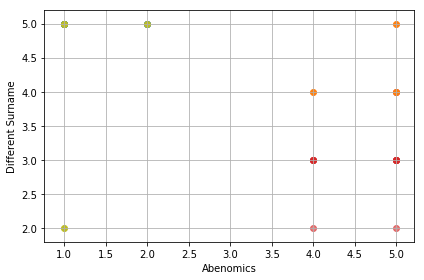

In [17]:
fig, ax = plt.subplots()

ax.scatter(df_LDP['Abenomics'], df_LDP['DifferentSurname'], c=c['r'], alpha=.6)
ax.scatter(df_KMI['Abenomics'], df_KMI['DifferentSurname'], c=c['o'])
ax.scatter(df_CDP['Abenomics'], df_CDP['DifferentSurname'], c=c['b'], alpha=.6)
ax.scatter(df_DPP['Abenomics'], df_DPP['DifferentSurname'], c=c['y'])
ax.set(xlabel='Abenomics', 
       ylabel='Different Surname')
ax.grid(True)
plt.tight_layout()
plt.show()

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


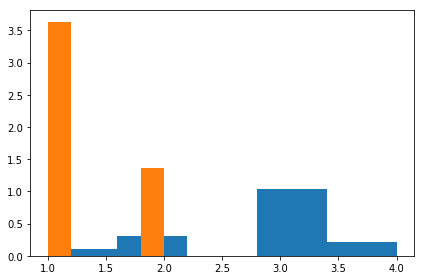

In [30]:
fig, ax = plt.subplots()

ax.hist(df_LDP['PrivacyRights'], bins=5, density=True, align='mid')
ax.hist(df_CDP['PrivacyRights'], bins=5, density=True, align='mid')
# ax.hist2d(df_LDP['Abenomics'], df_LDP['PrivacyRights'], bins=[5, 5])
plt.tight_layout()
plt.show()

In [54]:
# fig, ax = plt.subplots()

# ax.hist(df['Abenomics'], 5, density=False, labels=df['Party'])
# ax.hist(df_CDP['Abenomics'])

# scatter
# ax.scatter(df_CDP['Abenomics'], df_CDP['Diplomacy'], color=c['b'])
# ax.scatter(df_LDP['Abenomics'], df_LDP['Diplomacy'], color=c['r'])
# ax.scatter(df_DPFP['Abenomics'], df_DPFP['Diplomacy'], color=c['y'])
# ax.scatter(df_JCP['Abenomics'], df_JCP['Diplomacy'], color=c['v'])

# violin
# ax.violinplot(df)

ax.boxplot(df['Abenomics'], labels=df['Party'])

ax.grid(True)
plt.tight_layout()
plt.show()

ValueError: Dimensions of labels and X must be compatible

In [116]:
# df = df.dropna(thresh=10)
dat_ = dat_.dropna(thresh=15)

# X = pd.concat([df.iloc[:, 2:4], df.iloc[:, 6:]], axis=1)
# X = pd.concat([df.iloc[:, 3], df.iloc[:, 6:]], axis=1)
# X = pd.concat([dat_.iloc[:, 0:1], dat_.iloc[:, 2:]], axis=1)
# X = dat_.iloc[:, 3:]
X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)

# y = df.iloc[:, 4]
# y_gen = df.iloc[:, 2]
# y_age = df.iloc[:, 3]
# y_gen.tail()
y = dat_.iloc[:, 2]
# y_gen

# questions = X.columns.values
# len(X)
X.head(5)

,Age,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,...,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5
0,52,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,3.0,...,1.0,1.0,5.0,5.0,1.0,3.0,2.0,4.0,4.0,4.0
1,65,2.0,3.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,...,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
2,47,5.0,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,...,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
3,66,5.0,5.0,5.0,3.0,5.0,5.0,3.0,3.0,3.0,...,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,54,2.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,...,2.0,3.0,4.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0


In [48]:
dat_.head(5)

,Name,Age,Party,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,...,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5
0,森山佳則,52,11,1.0,1.0,1.0,3.0,1.0,1.0,2.0,...,1.0,1.0,5.0,5.0,1.0,3.0,2.0,4.0,4.0,4.0
1,高橋はるみ,65,1,2.0,3.0,2.0,4.0,2.0,2.0,3.0,...,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
2,畠山和也,47,6,5.0,5.0,4.0,5.0,4.0,3.0,5.0,...,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
3,岩瀬清次,66,12,5.0,5.0,5.0,3.0,5.0,5.0,3.0,...,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,岩本剛人,54,1,2.0,3.0,2.0,3.0,2.0,2.0,3.0,...,2.0,3.0,4.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0


In [9]:
X.tail(10)
y.tail(10)

360    13
361    12
362    12
363    12
364    12
365    15
366    15
367    15
368    15
369    16
Name: Party, dtype: int64

In [5]:
X['Gender'] = X['Gender'].replace('F', 1)
X['Gender'] = X['Gender'].replace('M', 0)

# X[X['Gender']=='M', 0] = 0
X.tail()
# gender_le

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(X).toarray()

,Gender,Age,Abenomics,Diplomacy,NourthernTerriories,SouthKorea,DefenceForce,JPUSSecurityArrangements,NorthKorea,PreemptiveStrike,...,ForeignWorker,PrivacyRights,DifferentSurname,SameSexMarriage,Redistricting,RestrictionOnParty,FemaleEmperor,MatrilinealEmperor,Miyake,ReturningImperialFamily
209,1,39,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,3.0,1.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0
210,0,78,5.0,5.0,4.0,5.0,4.0,4.0,4.0,3.0,...,3.0,3.0,4.0,3.0,1.0,5.0,4.0,NaN,NaN,NaN
211,0,49,4.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0,...,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0
212,0,65,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,3.0,3.0,3.0,1.0
213,0,72,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,5.0,3.0,5.0,1.0,1.0,3.0,3.0


In [117]:
# preprocessing

# df = df.dropna()

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(X.values)
Xi = imr.transform(X.values)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [118]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Xs = sc.fit_transform(X)
Xis = sc.fit_transform(Xi)

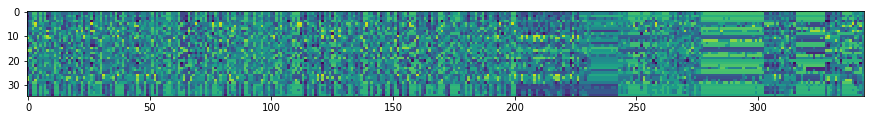

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(Xis.T, cmap='viridis')

In [101]:
parties = np.array([
    ['LDP', 'LDP', 'r', 'o', 1., '自民'],
    ['Koumei', 'Koumei', 'o', 'o', 2., '公明'],
    ['independent', 'Independent', 'gr', 'o', 3., '無所属'],
    ['CDP', 'CDP', 'c', 'o', 4., '立憲'],
    ['DPFP', 'DPFP', 'b', 'o', 5., '国民'],
    ['JCP', 'JCP', 'g', 'o', 6., '共産'],
    ['Ishin', 'Ishin', 'y', 'o', 7., '維新'],
    ['Kibou', 'Kibou', 'y', '^', 8., '希望'],
    ['SDP', 'SDP', 'v', 'o', 9., '社民'],
    ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
    ['Koufuku', 'Koufuku', 'r', '^', 11., '幸福'],
    ['Labour', 'Labour', 'br', '^', 12., '労働'],
    ['NHK', 'NHK', 'o', '^', 13., 'N国'],
    ['Shoha', 'Shoha', 'br', '^', 14., '諸派'],
    ['Olive', 'Olive', 'v', '^', 15., 'オリーブ'],
    ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
])
    
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
# ])

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
# lr = LogisticRegression()

# X_pca2 = pca2.fit_transform(X)
# Xs_pca2 = pca2.fit_transform(Xs)
Xis_pca2 = pca2.fit_transform(Xis)

dt = datetime.datetime.now()
ana_name = 'analysis/{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
# os.mkdir(ana_name)

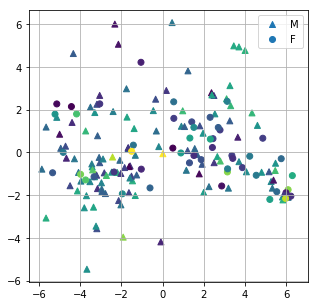

In [11]:
# X_train_pca

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(Xis_pca2[y_gen=='M', 0], Xis_pca2[y_gen=='M', 1], c=y_age[y_gen=='M'], cmap='viridis', marker='^', label='M')
ax.scatter(Xis_pca2[y_gen=='F', 0], Xis_pca2[y_gen=='F', 1], c=y_age[y_gen=='F'], cmap='viridis', marker='o', label='F')
ax.legend(loc='best')
ax.grid(True)
# ax[1].scatter(X_pca2[y_gen=='M', 0], X_pca2[y_gen=='M', 1], c=y_age[y_gen=='M'], cmap='viridis', marker='^', label='M')
# ax[1].scatter(X_pca2[y_gen=='F', 0], X_pca2[y_gen=='F', 1], c=y_age[y_gen=='F'], cmap='viridis', marker='o', label='F')
# ax[1].legend(loc='best')

plt.show()

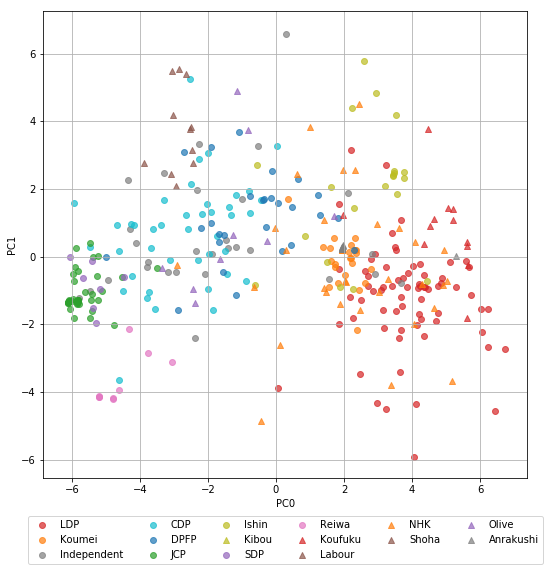

In [121]:
fig, ax = plt.subplots(figsize=(8,8))

# for i in range(len(y)):
# for yi, xi in zip(y, X_train_pca):
#     if y.iloc[[i]] == 'LDP':

# for party in parties:
for party, p in zip(parties, range(16)):
    # ax.scatter(X_pca2[y==party[0], [0]], X_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
    # ax.scatter(Xs_pca2[y==party[0], [0]], Xs_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
    # ax.scatter(Xis_pca2[y==party[0], [0]], Xis_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
    
    ax.scatter(Xis_pca2[y==p+1, [0]], Xis_pca2[y==p+1, [1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
    #ax.scatter(Xis_pca2[y==party[4], [0]], Xis_pca2[y==party[4], [1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
    #ax.scatter(Xis_pca2[y==p+1, [0]], Xis_pca2[y==p+1, [1]], label=dat_.iloc[p, 0], c=c[party[2]], marker=party[3], alpha=.7)

#     print(yi[0])

ax.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.07))
ax.set(xlabel='PC0', ylabel='PC1')
# ax.set(xlim=(-10, 10), ylim=(-10,10))
ax.grid(True)
plt.tight_layout()
# plt.savefig('{}/PCA2.png'.format(ana_name))
plt.show()

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

In [103]:
import plotly.graph_objs as go

data = []
l = []
for party, p in zip(parties, range(len(parties))):
    trance0 = go.Scatter(
        x = Xis_pca2[y==p+1, [0]],
        y = Xis_pca2[y==p+1, [1]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
#             symbol = party[3],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0],
    )
    l.append(trance0)

layout = go.Layout(
    title = '',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    showlegend = True
)
fig = go.Figure(data=l, layout = layout)
py.iplot(fig, filename='pca_2')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

In [24]:
def plot(Q4_1, Q4_2, Q4_3, Q4_4, Q4_5, Q4_6, Q4_7, Q4_8, Q4_9, Q4_10, Q4_11, Q4_12, 
         Q5_1, Q5_2, Q5_3, Q5_4, Q5_5, Q5_6, Q5_7, 
         Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, 
         Q7, 
         Q8_1, Q8_2, Q8_3, Q8_4, 
         Q9_1, Q9_2, Q9_3, Q9_4, Q9_5):
    Xe = pd.DataFrame(np.array([[
        Q4_1, Q4_2, Q4_3, Q4_4, Q4_5, Q4_6, Q4_7, Q4_8, Q4_9, Q4_10, Q4_11, Q4_12, 
        Q5_1, Q5_2, Q5_3, Q5_4, Q5_5, Q5_6, Q5_7, 
        Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, 
        Q7, 
        Q8_1, Q8_2, Q8_3, Q8_4, 
        Q9_1, Q9_2, Q9_3, Q9_4, Q9_5]]))
    
    Xei = imr.transform(Xe.values)
    Xeis = sc.transform(Xei)
    Xeis_pca2 = pca2.transform(Xeis)
    
    
    fig, ax = plt.subplots(figsize=(8,8))

    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(X_pca2[y==party[0], [0]], X_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
        # ax.scatter(Xs_pca2[y==party[0], [0]], Xs_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])
        # ax.scatter(Xis_pca2[y==party[0], [0]], Xis_pca2[y==party[0], [1]], label=party[1], c=c[party[2]], marker=party[3])

        ax.scatter(Xis_pca2[y==p+1, [0]], Xis_pca2[y==p+1, [1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
        #ax.scatter(Xis_pca2[y==party[4], [0]], Xis_pca2[y==party[4], [1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
        
    ax.scatter(Xeis_pca2[:, [0]], Xeis_pca2[:, [1]], label='You', c='k', marker='x')

    ax.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.07))
    ax.set(xlabel='PC0', ylabel='PC1')
    # ax.set(xlim=(-10, 10), ylim=(-10,10))
    ax.grid(True)
    plt.tight_layout()
    # plt.savefig('{}/PCA2.png'.format(ana_name))
    plt.show()

    # plotly
    # plot_fig = tls.mpl_to_plotly(fig)
    # plot_url = py.plot_mpl(fig)

# plot(np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan)

from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plot, 
         Q4_1=(1,5), Q4_2=(1,5), Q4_3=(1,5), Q4_4=(1,5), Q4_5=(1,5), Q4_6=(1,5), 
         Q4_7=(1,5), Q4_8=(1,5), Q4_9=(1,5), Q4_10=(1,5), Q4_11=(1,5), Q4_12=(1,5), 
         Q5_1=(1,5), Q5_2=(1,5), Q5_3=(1,5), Q5_4=(1,5), Q5_5=(1,5), Q5_6=(1,5), Q5_7=(1,5), 
         Q6_1=(1,5), Q6_2=(1,5), Q6_3=(1,5), Q6_4=(1,5), Q6_5=(1,5), 
         Q7=(1,5), 
         Q8_1=(1,5), Q8_2=(1,5), Q8_3=(1,5), Q8_4=(1,5), 
         Q9_1=(1,5), Q9_2=(1,5), Q9_3=(1,5), Q9_4=(1,5), Q9_5=(1,5))

interactive(children=(IntSlider(value=3, description='Q4_1', max=5, min=1), IntSlider(value=3, description='Q4…

<function __main__.plot(Q4_1, Q4_2, Q4_3, Q4_4, Q4_5, Q4_6, Q4_7, Q4_8, Q4_9, Q4_10, Q4_11, Q4_12, Q5_1, Q5_2, Q5_3, Q5_4, Q5_5, Q5_6, Q5_7, Q6_1, Q6_2, Q6_3, Q6_4, Q6_5, Q7, Q8_1, Q8_2, Q8_3, Q8_4, Q9_1, Q9_2, Q9_3, Q9_4, Q9_5)>

In [20]:
dat_q.iloc[0:34, 1:3]

,Title,HTML
0,防衛力強化,日本の防衛力はもっと強化すべきだ
1,先制攻撃,他国から攻撃が予想される場合は先制攻撃をためらうべきではない
2,対北朝鮮,北朝鮮には対話より圧力を優先すべきだ
3,政府の規模,政府のサービスが悪化しても、お金のかからない小さな政府が良い
4,公共事業,公共事業による雇用確保は必要だ
5,財政出動,歳出抑制より景気対策のために財政出動を行うべきだ
6,農協改革,全農の株式会社化など農協の組織改革を進めるべきだ
7,外国人労働者,外国人労働者の受け入れを進めるべきだ
8,治安か人権か,治安維持のためプライバシーや個人の権利の制約は当然だ
9,夫婦別姓,夫婦が望む場合、結婚後の別姓を法律で認めるべきだ


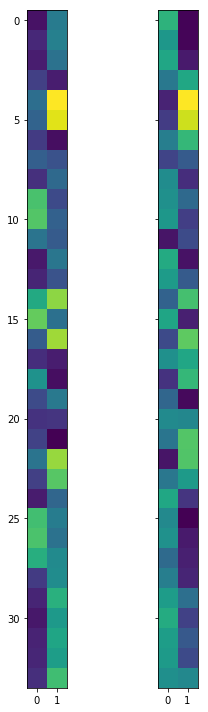

In [96]:
comp = pca2.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,10))
ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)
# ax[0].set(yticks=np.arange(len(questions)), 
#           yticklabels=questions)
# ax.set(xticks=np.array(y))
plt.tight_layout()
plt.savefig('{}/comp.png'.format(ana_name))
plt.show()

In [97]:
np.savetxt('{}/X.csv'.format(ana_name), X, delimiter=',')
np.savetxt('{}/Xis.csv'.format(ana_name), Xis, delimiter=',')
np.savetxt('{}/pca2.csv'.format(ana_name), Xis_pca2, delimiter=',')
np.savetxt('{}/comp.csv'.format(ana_name), comp, delimiter=',')
y.to_csv('{}/y.csv'.format(ana_name), index=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [98]:
dat_q.to_csv('{}/dat_q.csv'.format(ana_name), index=False)

In [194]:
dat_q.iloc[[3, 4, 5, 6, 14, 16, 17, 18, 20, 21, 22], 2]

3                        政府のサービスが悪化しても、お金のかからない小さな政府が良い
4                                       公共事業による雇用確保は必要だ
5                              歳出抑制より景気対策のために財政出動を行うべきだ
6                              全農の株式会社化など農協の組織改革を進めるべきだ
14    <span class="q_textA">Ａ</span>国内産業を保護すべきだ<br/>...
16    <span class="q_textA">Ａ</span>財政赤字を心配する必要なし<br...
17    <span class="q_textA">Ａ</span>経済的規制の緩和徹底<br/><...
18    <span class="q_textA">Ａ</span>一票の格差是正のため、参院選の「...
20                                  年金・医療費給付を現行水準より抑制する
21                            競争力のない産業・企業の保護を現行水準より削減する
22                       基礎的財政収支（プライマリーバランス）の均衡達成を先送りする
Name: HTML, dtype: object

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3)
lr = LogisticRegression()

# X_pca3 = pca3.fit_transform(X)
# Xs_pca3 = pca3.fit_transform(Xs)
Xis_pca3 = pca3.fit_transform(Xis)

dt = datetime.datetime.now()
ana_name = 'analysis/{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
os.mkdir(ana_name)

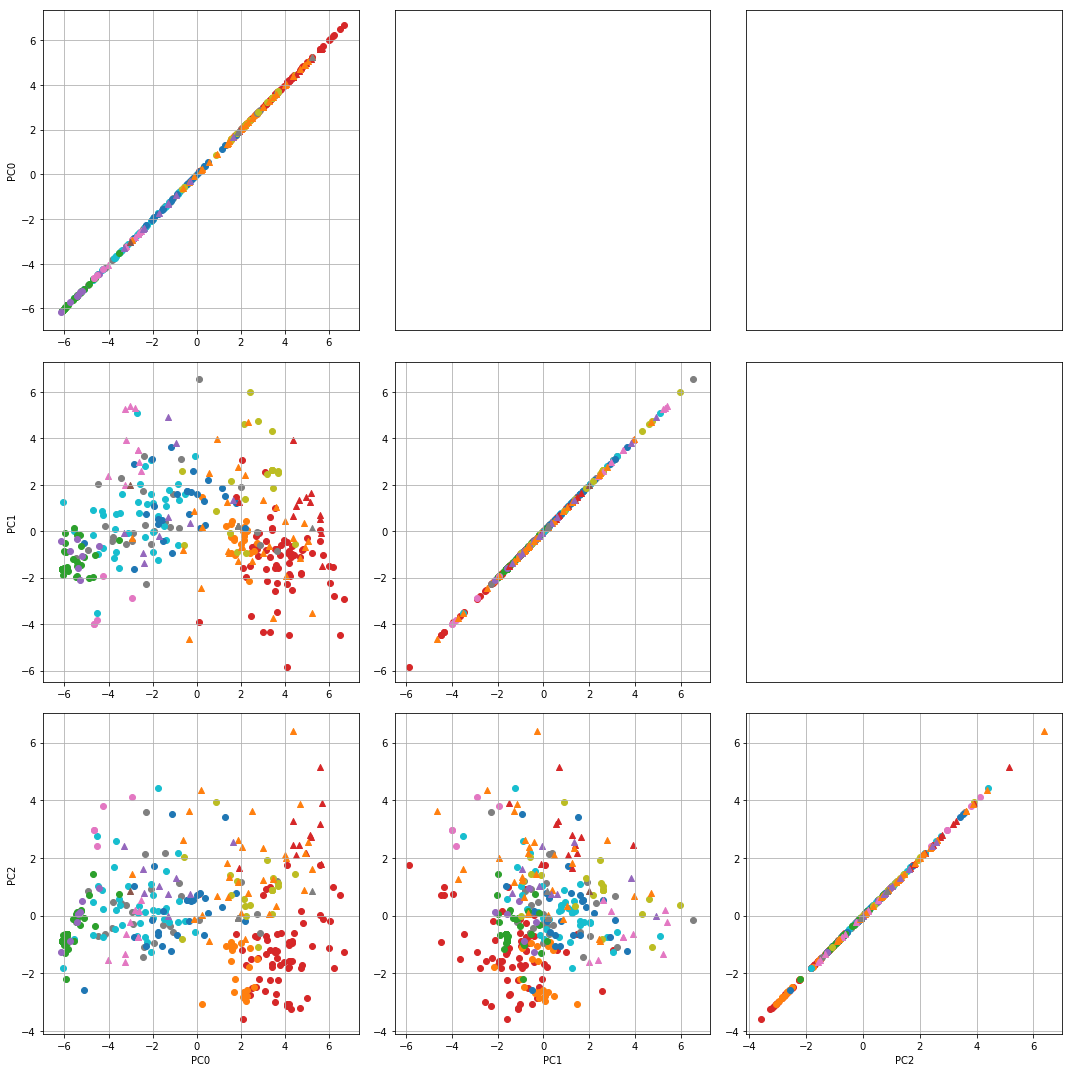

In [15]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    ax[2,i].set(xlabel=('PC%d' % i))
    ax[i,0].set(ylabel=('PC%d' % i))
    
    for j in range(3):
        if j >= i:
            # for party in parties:
            for party, p in zip(parties, range(16)):
                # ax[j,i].scatter(X_pca3[y==party[0], [i]], X_pca3[y==party[0], [j]], label=party[1], c=c[party[2]], marker=party[3])
                # ax[j,i].scatter(Xs_pca3[y==party[0], [i]], Xs_pca3[y==party[0], [j]], label=party[1], c=c[party[2]], marker=party[3])
                # ax[j,i].scatter(Xis_pca3[y==party[0], [i]], Xis_pca3[y==party[0], [j]], label=party[1], c=c[party[2]], marker=party[3])
                
                ax[j,i].scatter(Xis_pca3[y==p+1, [i]], Xis_pca3[y==p+1, [j]], label=party[1], c=c[party[2]], marker=party[3])
            ax[j,i].grid(True)
        #elif j == i:
            #for party in parties:
                #ax[j,i].violinplot(Xis_pca3[y==party[0], [i]], color=c[party[2]], alpha=.7)
            #ax[j,i].set(ylim=(0, 5))
            #ax[j,i].grid(True)
        elif j < i:
            ax[j,i].set(xticks=[], yticks=[])
#     print(yi[0])

#         ax[i,j].legend(loc='best')
        
# fig.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
# plt.savefig('{}/PCA3.png'.format(ana_name))
plt.show()

# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

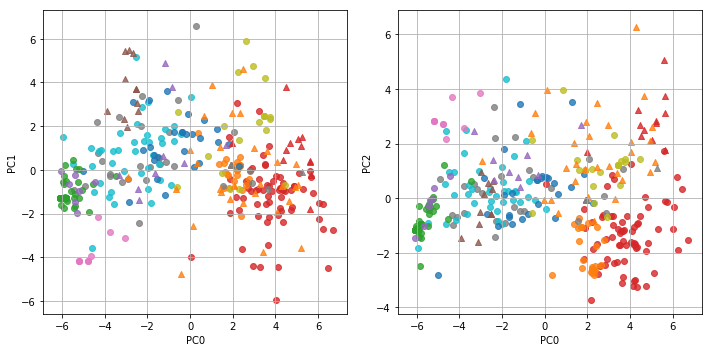

In [107]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

for ax, i in zip(axs, range(2)):
    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(Xis_pca3[y==party[0], [0]], Xis_pca3[y==party[0], [i+1]], label=party[1], c=c[party[2]], marker=party[3])
        ax.scatter(Xis_pca3[y==p+1, [0]], Xis_pca3[y==p+1, [i+1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.8)
        ax.set(xlabel='PC0', ylabel='PC{}'.format(i+1))
    ax.grid(True)
#     if i == 0:
#         ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.07))
plt.tight_layout()
plt.savefig('{}/PCA3_2.png'.format(ana_name))
plt.show()

In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

for ax, i in zip(axs, range(2)):
    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(Xis_pca3[y==party[0], [0]], Xis_pca3[y==party[0], [i+1]], label=party[1], c=c[party[2]], marker=party[3])
        sc = ax.scatter(Xis_pca3[y==p+1, [0]], Xis_pca3[y==p+1, [i+1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.8)
        ax.set(xlabel='PC0', ylabel='PC{}'.format(i+1))
    ax.grid(True)
#     if i == 0:
#         ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.07))
plt.tight_layout()
# plt.savefig('{}/PCA3_2.png'.format(ana_name))
plot_fig = tls.mpl_to_plotly(fig)
# py.iplot(plot_fig, filename='pca3_py')
plot_url = py.plot_mpl(fig)
plt.show()

In [108]:
import plotly.graph_objs as go

data = []
l = []
for party, p in zip(parties, range(len(parties))):
    trance0 = go.Scatter(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [1]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
#             symbol = party[3],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0],
    )
    l.append(trance0)

layout = go.Layout(
    title = '',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    showlegend = True
)
fig = go.Figure(data=l, layout = layout)
py.iplot(fig, filename='pca_3')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [104]:
pca.explained_variance_ratio_

array([0.42477799, 0.13941708, 0.08584697, 0.04700243])

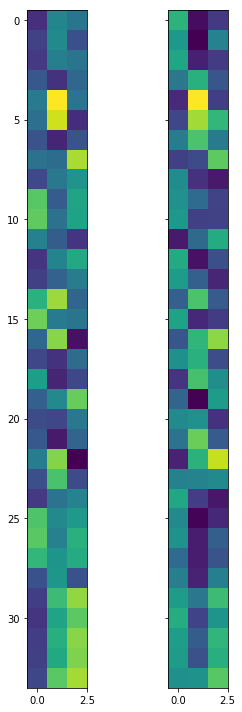

In [17]:
comp = pca3.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(sharey=True, ncols=2, figsize=(5,10))
ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)

# ax[0].set(yticks=np.arange(len(questions)), 
#          yticklabels=questions)
plt.tight_layout()
# plt.savefig('{}/comp.png'.format(ana_name))
plt.show()

In [176]:
np.savetxt('{}/X.csv'.format(ana_name), X, delimiter=',')
np.savetxt('{}/Xis.csv'.format(ana_name), Xis, delimiter=',')
np.savetxt('{}/pca3.csv'.format(ana_name), Xis_pca3, delimiter=',')
np.savetxt('{}/comp.csv'.format(ana_name), comp, delimiter=',')
y.to_csv('{}/y.csv'.format(ana_name), index=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [ ]:
dat_q.iloc[[4, 5, 6, 14, 16, 17, 18, 20, 21, 22], 2]
dat_q.iloc[[16, 22], 2]

In [191]:
print(list(X.columns.values[[11, 10, 15, 17,18, 24]]))

print(list(X.columns.values[[11, 10, 27, 24]]))
print(list(X.columns.values[[20, 0, 26, 2, 3]]))

['FiscalDeficit', 'PrimaryBalance', 'Trade', 'FiscalStimulus', 'PublicEnterprise', 'DifferentSurname']
['FiscalDeficit', 'PrimaryBalance', 'RestrictionOnParty', 'DifferentSurname']
['AgriculturalCooperative', 'Abenomics', 'Redistricting', 'NourthernTerriories', 'SouthKorea']


In [25]:
n_comp = 4
pca4 = PCA(n_components=n_comp)

# Xs_pca4 = pca4.fit_transform(Xs)
Xis_pca4 = pca4.fit_transform(Xis)

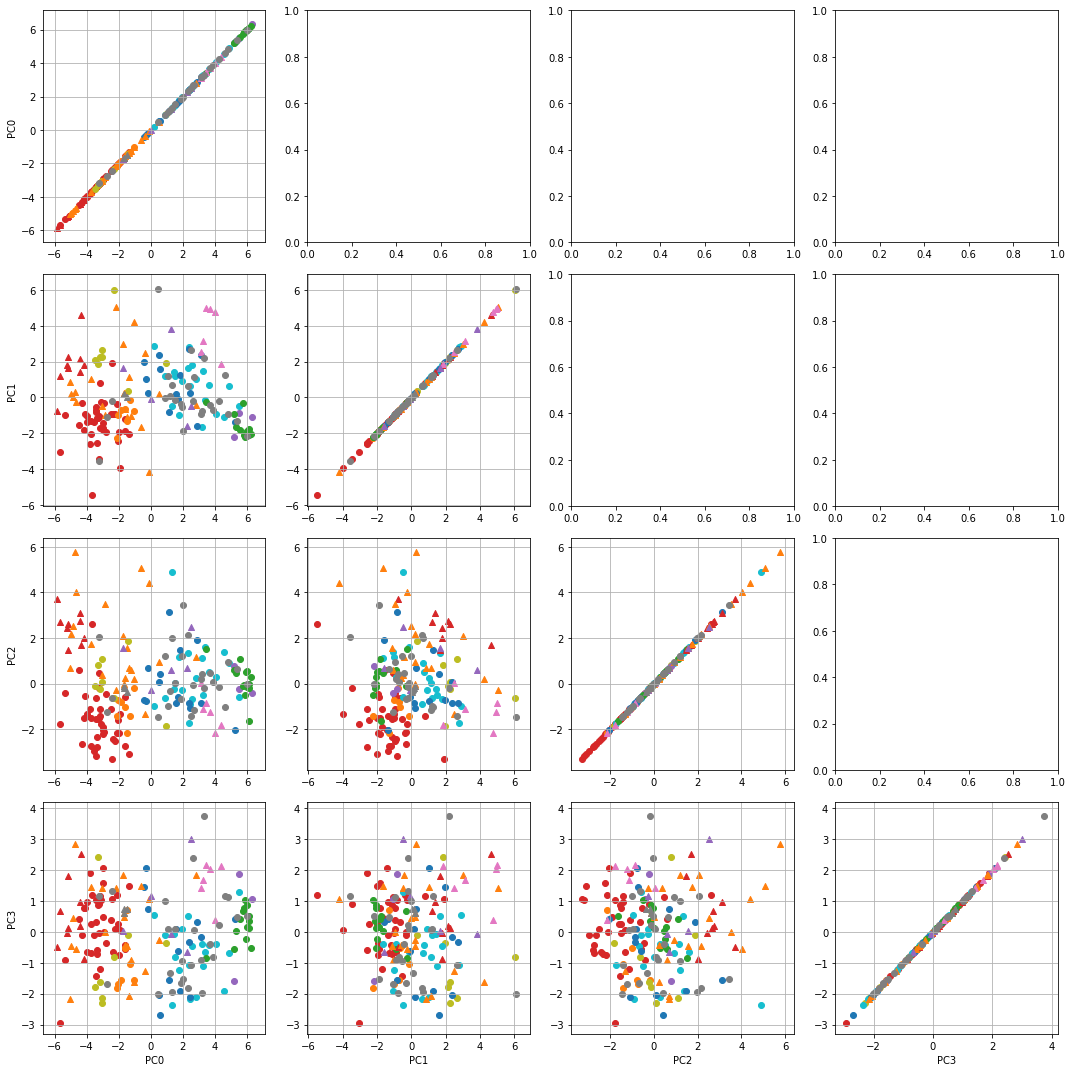

In [27]:
fig, ax = plt.subplots(ncols=n_comp, nrows=n_comp, figsize=(15,15))

for i in range(n_comp):
    ax[n_comp-1,i].set(xlabel=('PC%d' % i))
    ax[i,0].set(ylabel=('PC%d' % i))
    for j in range(n_comp):
        if j >= i:
            for party in parties:
#                 ax[j,i].scatter(Xs_pca4[y==party[0], [i]], 
#                                 Xs_pca4[y==party[0], [j]], 
#                                 label=party[1],
#                                 c=c[party[2]], 
#                                 marker=party[3])
                ax[j,i].scatter(Xis_pca4[y==party[0], [i]], 
                                Xis_pca4[y==party[0], [j]], 
                                label=party[1],
                                c=c[party[2]], 
                                marker=party[3])
            ax[j,i].grid(True)
            
# fig.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
# plt.savefig('PCA3.png')
plt.show()

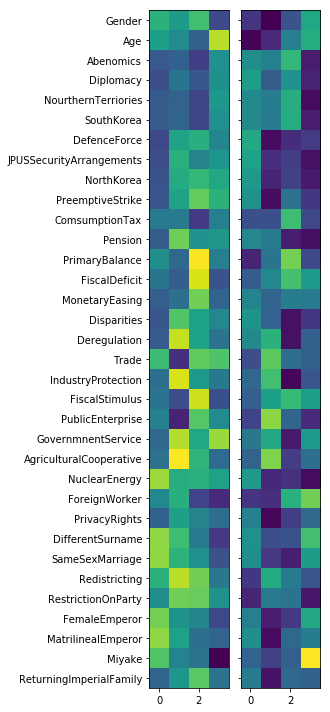

In [28]:
comp = pca4.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(sharey=True, ncols=2, figsize=(5,10))

ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)

ax[0].set(yticks=np.arange(len(questions)), 
       yticklabels=questions)
# ax[1].set(yticks=np.arange(len(questions)), 
#        yticklabels=questions)
plt.tight_layout()
# plt.savefig('PCA3_comp')
plt.show()

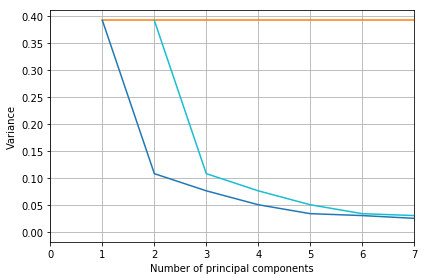

In [18]:
# model compare

vars_best = np.array([])
vars_worst2 = np.array([])
vars_worst = np.array([])

# for n in np.arange(len(Xs[0]), 0, -1):
for n in np.arange(len(Xis[0]), 0, -1):
    pca = PCA(n_components=n)

    # Xs_pca = pca.fit_transform(Xs)
    Xis_pca = pca.fit_transform(Xis)
    var_best = pca.explained_variance_ratio_[0]
    if n > 1:
        var_worst2 = pca.explained_variance_ratio_[-2]
        vars_worst2 = np.append(vars_worst2, np.array([var_worst2]))
    var_worst = pca.explained_variance_ratio_[-1]
    
    vars_best = np.append(vars_best, np.array([var_best]))
    vars_worst = np.append(vars_worst, np.array([var_worst]))

fig, ax = plt.subplots()
# ax.plot(np.arange(len(Xs[0]), 0, -1), vars_best, c=c['o'])
# ax.plot(np.arange(len(Xs[0]), 1, -1), vars_worst2, c=c['c'])
# ax.plot(np.arange(len(Xs[0]), 0, -1), vars_worst, c=c['b'])

ax.plot(np.arange(len(Xis[0]), 0, -1), vars_best, c=c['o'])
ax.plot(np.arange(len(Xis[0]), 1, -1), vars_worst2, c=c['c'])
ax.plot(np.arange(len(Xis[0]), 0, -1), vars_worst, c=c['b'])

ax.grid(True)
ax.set(xlabel='Number of principal components', 
       ylabel='Variance',
       xticks=np.arange(8),
       xlim=(0, 7)
      )
plt.tight_layout()
plt.show()

In [48]:
pca2.explained_variance_ratio_

array([0.39733277, 0.12853882])

In [99]:
import json

dat_json = {}
dat_json['pca2'] = []
dat_json['comp'] = []

for i in range(len(Xis_pca2)):
    dat_json['pca2'].append({
        'name': dat_.iloc[i, 0],
        'party': parties[dat_.iloc[i, 2]-1, 5],
        'PC0': Xis_pca2[i, 0],
        'PC1': Xis_pca2[i, 1]
    })
for i in range(len(comp.T)):
    dat_json['comp'].append({
        'PC0': comp[0, i],
        'PC1': comp[1, i]
    })

with open('{}/data.txt'.format(ana_name), 'w') as outfile:  
    json.dump(dat_json, outfile, ensure_ascii=False)